In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report



In [66]:
#Pipeline
df = pd.read_csv('startup_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [76]:
df2 = df.drop(columns = ['Unnamed: 0', 'Unnamed: 6', 'object_id', 'id', 'state_code.1', 'state_code', 'city', 'latitude', 'longitude', 'zip_code', 'name', 'category_code', 'closed_at'])
df2 = pd.get_dummies(df2, columns=['status'], dtype=int)

col_names = df2.columns[:].tolist()

for col in df2.columns:
    if df2[col].dtype == 'object':
        try:
            df2[col] = pd.to_datetime(df2[col])
            df2[col] = df2[col].astype('int64')
        except ValueError:
            #skipping col if conversion fails
            pass
impute_cols = ['age_first_milestone_year', 'age_last_milestone_year']
scale_cols1 = [col for col in df2.columns[1:19] if col not in impute_cols]
scale_cols2 = [col for col in df2.columns[33:34] if col not in impute_cols]

impute_pl = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
scaler_pl = Pipeline(steps=[("scaler",   StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ("impute", impute_pl, impute_cols),
        ("scale1", scaler_pl, scale_cols1),
        ("scale2", scaler_pl, scale_cols2),
    ],
    remainder="passthrough" #other cols stay the same
)

df2_tf = preprocessor.fit_transform(df2)



In [78]:
df_tf = pd.DataFrame(df2_tf, columns=col_names)


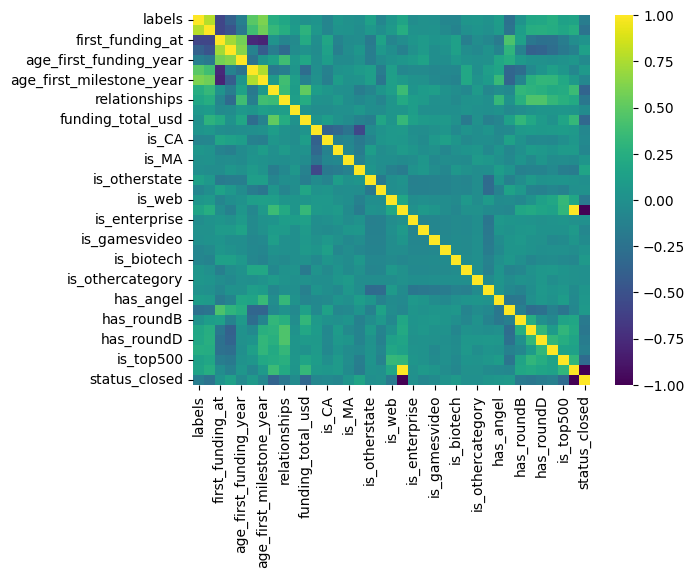

In [80]:
corr_matrix = df_tf.corr()
sns.heatmap(corr_matrix, annot=False, cmap="viridis")
plt.show()

In [ ]:
clf = Pipeline()